# Clustering & PCA Assignment

## Problem Statement

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.


### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Read and understand the data

In [2]:
country = pd.read_csv(r"C:\Users\Varun\Desktop\python\Clustering\Assignment\Country-data.csv")
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
country.shape

(167, 10)

In [4]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


### Clean Data

In [5]:
#checking for missing values
round(100*(country.isnull().sum())/len(country), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

There are no missing values and hence no data cleaning or imputing of null values required.

### Outlier Analysis

In [6]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


{'whiskers': [<matplotlib.lines.Line2D at 0xa5d201a320>,
 'caps': [<matplotlib.lines.Line2D at 0xa5d201a9b0>,
 'boxes': [<matplotlib.lines.Line2D at 0xa5d2012ef0>],
 'medians': [<matplotlib.lines.Line2D at 0xa5d201add8>],
 'fliers': [<matplotlib.lines.Line2D at 0xa5d20283c8>],
 'means': []}

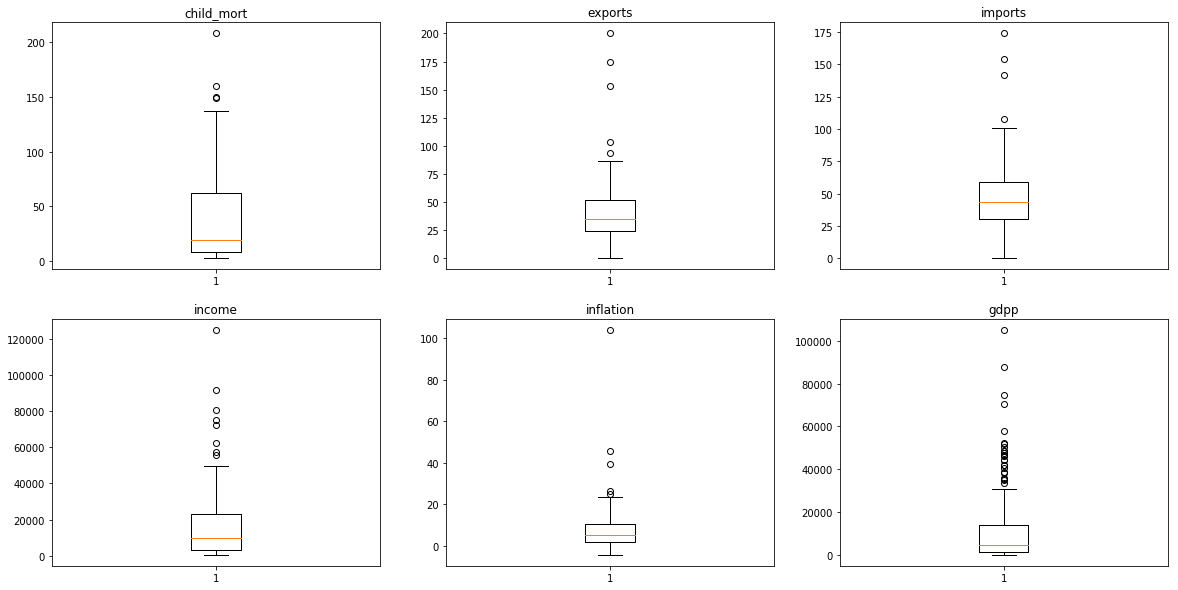

In [7]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.title('child_mort')
plt.boxplot(country['child_mort'])

plt.subplot(2,3,2)
plt.title('exports')
plt.boxplot(country['exports'])

plt.subplot(2,3,3)
plt.title('imports')
plt.boxplot(country['imports'])

plt.subplot(2,3,4)
plt.title('income')
plt.boxplot(country['income'])

plt.subplot(2,3,5)
plt.title('inflation')
plt.boxplot(country['inflation'])

plt.subplot(2,3,6)
plt.title('gdpp')
plt.boxplot(country['gdpp'])

We can see that there are indeed outliers for variables such as child_mort, exports, imports, income, inflation and gdpp.

So we will now look to remove some of these outliers from the dataset before doing the clustering

### Outlier treatment

In [8]:
#outlier analysis for child_mort
Q1 = country.child_mort.quantile(0.05)
Q3 = country.child_mort.quantile(0.98)
IQR = Q3 - Q1
country = country[(country.child_mort <= Q3)]

#outlier analysis for exports
Q1 = country.exports.quantile(0.05)
Q3 = country.exports.quantile(0.95)
IQR = Q3 - Q1
country = country[(country.exports >= Q1 - 1.5*IQR) & (country.exports <= Q3 + 1.5*IQR)]

#outlier analysis for imports
Q1 = country.imports.quantile(0.05)
Q3 = country.imports.quantile(0.95)
IQR = Q3 - Q1
country = country[(country.imports >= Q1 - 1.5*IQR) & (country.imports <= Q3 + 1.5*IQR)]

#outlier analysis for income
Q1 = country.income.quantile(0.05)
Q3 = country.income.quantile(0.95)
IQR = Q3 - Q1
country = country[(country.income >= Q1 - 1.5*IQR) & (country.income <= Q3 + 1.5*IQR)]

#outlier analysis for inflation
Q1 = country.inflation.quantile(0.05)
Q3 = country.inflation.quantile(0.95)
IQR = Q3 - Q1
country = country[(country.inflation >= Q1 - 1.5*IQR) & (country.inflation <= Q3 + 1.5*IQR)]

#outlier analysis for gdpp
Q1 = country.gdpp.quantile(0.05)
Q3 = country.gdpp.quantile(0.98)
IQR = Q3 - Q1
country = country[(country.gdpp <= Q3)]

In [9]:
len(country)

156

So we lost 11 rows after the outlier analysis

In [10]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,35.690385,39.536532,6.786603,46.018371,15396.634615,7.336378,70.801282,2.922756,11012.692308
std,34.571256,22.393660,2.678906,21.141772,15162.670296,7.607888,7.992182,1.477637,13942.413656
min,2.600000,0.109000,1.970000,0.065900,609.000000,-4.210000,46.500000,1.230000,231.000000
25%,8.675000,23.800000,4.960000,30.625000,3632.500000,1.762500,65.475000,1.797500,1372.500000
50%,19.500000,35.000000,6.270000,43.250000,9950.000000,5.265000,73.100000,2.410000,4635.000000
75%,56.925000,51.225000,8.512500,58.675000,21275.000000,10.950000,76.625000,3.842500,12950.000000
max,137.000000,153.000000,17.900000,154.000000,80600.000000,45.900000,82.800000,7.490000,52100.000000


## Standardizing the variables

In [11]:
country_df = country.drop('country', axis = 1)

# instantiate
scaler = StandardScaler()

# fit_transform
country_df_scaled = scaler.fit_transform(country_df)
country_df_scaled.shape

C:\Users\Varun\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Varun\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(156, 9)

In [12]:
country_df.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [13]:
#converting the array back into dataframe

country_df_scaled = pd.DataFrame(country_df_scaled)
country_df_scaled.columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp']
country_df_scaled.head()



,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.581810,-1.323216,0.297119,-0.053069,-0.912177,0.277396,-1.832830,1.967043,-0.752623
1,-0.553982,-0.516829,-0.088605,0.122504,-0.361694,-0.375340,0.690228,-0.864120,-0.498119
2,-0.243480,-0.050916,-0.979889,-0.693672,-0.165187,1.155622,0.715333,-0.022240,-0.471496
3,2.417555,1.019788,-1.474214,-0.147973,-0.628334,1.986377,-1.343281,2.197881,-0.538414
4,-0.736802,0.267159,-0.283339,0.611260,0.245029,-0.777531,0.752991,-0.538231,0.085432


In [14]:
country_df_scaled.shape

(156, 9)

## Performing PCA on the standardized dataset

In [15]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [16]:
#Doing the PCA on the data
pca.fit(country_df_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

Let's plot the principal components and try to make sense of them
    
   Plotting original features on the first 2 principal components as axes



In [17]:
pca.components_

array([[-0.43364239,  0.20872035,  0.19276829,  0.07622229,  0.40319081,
        -0.19995713,  0.43645586, -0.41358232,  0.4016602 ],
       [ 0.04101954,  0.6188665 , -0.11627096,  0.72904203, -0.09693681,
        -0.12176915, -0.13238887,  0.01035298, -0.16864749],
       [-0.11048856,  0.28097448, -0.66374904, -0.19724587,  0.20097804,
         0.60323459,  0.1170107 , -0.09904845, -0.03988309],
       [ 0.37498699,  0.22937658,  0.22437383, -0.01413568,  0.46659065,
         0.19721461, -0.21759335,  0.44454242,  0.50464091],
       [-0.18783516, -0.03917865,  0.58729021,  0.21384009, -0.15645578,
         0.72065974,  0.02823009, -0.10615628, -0.12903739],
       [ 0.01382891,  0.13132009,  0.09762883, -0.21840036,  0.16617598,
        -0.03612923, -0.73615204, -0.59292939, -0.05411865],
       [-0.07953163, -0.64357319, -0.29169244,  0.56652811,  0.26078624,
         0.10213555, -0.21091619, -0.09112172,  0.20547445],
       [-0.73125595,  0.03446328,  0.02944848, -0.08553294,  0

In [112]:
colnames = list(country_df_scaled.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head(20)

,PC1,PC2,Feature
0,-0.433642,0.041020,child_mort
1,0.208720,0.618866,exports
2,0.192768,-0.116271,health
3,0.076222,0.729042,imports
4,0.403191,-0.096937,income
5,-0.199957,-0.121769,inflation
6,0.436456,-0.132389,life_expec
7,-0.413582,0.010353,total_fer
8,0.401660,-0.168647,gdpp


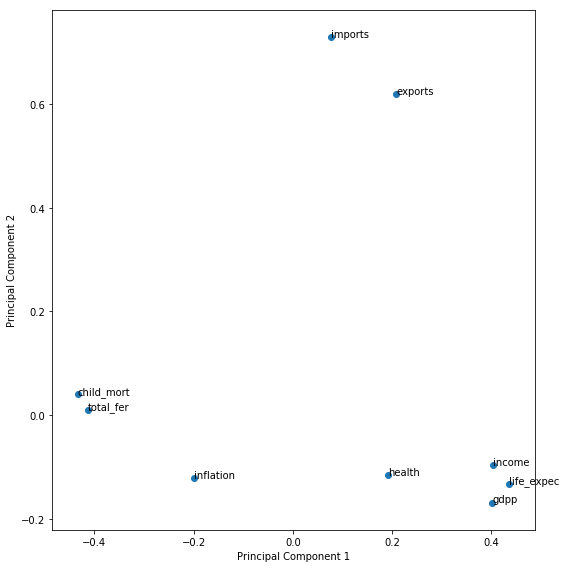

In [19]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

## Checking Scree plot to assess number of required PCs

In [20]:
pca.explained_variance_ratio_

array([0.46132765, 0.17645442, 0.13976041, 0.10227075, 0.06724601,
       0.02106628, 0.01566103, 0.00923044, 0.00698301])

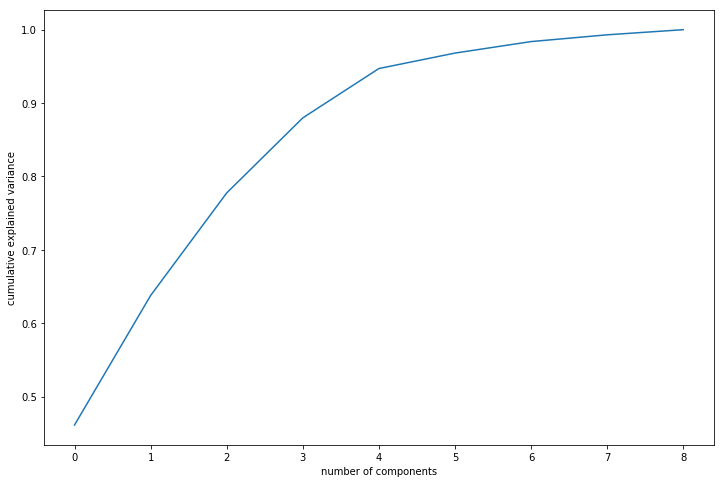

In [21]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Looks like 5 components can describe more than 95% of the variance on the data.

- Hence we'll choose 5 components for our modelling

In [22]:
#Using incremental PCA for efficiency 
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

### Basis transformation - getting the data onto Principal components

In [23]:
df_country_pca = pca_final.fit_transform(country_df_scaled)
df_country_pca.shape

(156, 5)

In [24]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_country_pca.transpose())

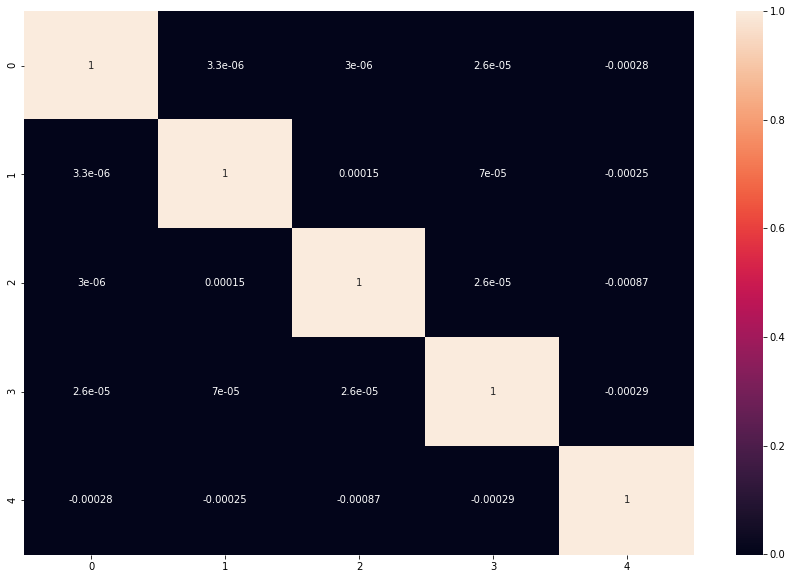

In [25]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (15,10))
sns.heatmap(corrmat,annot = True)

We can see that there is no correlation between our principal components and hence PCA has done a good job

### Performing K-means clustering on PCA data

In [26]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(df_country_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [27]:
kmeans.labels_

array([3, 1, 0, 3, 1, 0, 0, 2, 2, 0, 2, 1, 0, 1, 1, 2, 1, 3, 1, 0, 1, 3,
       0, 2, 1, 3, 3, 1, 3, 2, 1, 0, 0, 0, 3, 3, 3, 1, 3, 1, 2, 1, 0, 0,
       0, 1, 3, 3, 1, 1, 2, 2, 0, 3, 1, 2, 3, 2, 1, 0, 3, 3, 1, 1, 2, 0,
       0, 0, 0, 2, 2, 2, 0, 2, 1, 0, 3, 3, 2, 1, 3, 1, 1, 3, 3, 0, 1, 1,
       3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 0, 1, 1, 3, 0, 3, 0, 2, 2, 3, 0, 3,
       1, 1, 0, 0, 1, 2, 1, 0, 3, 1, 0, 3, 1, 1, 1, 2, 1, 3, 2, 2, 0, 1,
       3, 1, 2, 0, 3, 1, 3, 3, 0, 1, 0, 1, 3, 1, 2, 2, 2, 0, 0, 1, 0, 1,
       0, 3])

#### Finding Optimal number of clusters

__Elbow Curve__

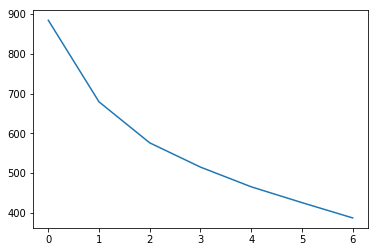

In [28]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_country_pca)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

__Sillhouete Analysis__

In [29]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_country_pca)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_country_pca, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.29726057492282987
For n_clusters=3, the silhouette score is 0.30186326275710396
For n_clusters=4, the silhouette score is 0.26688062493439635
For n_clusters=5, the silhouette score is 0.25674221859745056
For n_clusters=6, the silhouette score is 0.28433267229835446
For n_clusters=7, the silhouette score is 0.28042240299010146
For n_clusters=8, the silhouette score is 0.2322489261933252


__From both the elbow curve as well as the sillhouette analysis, it seems k=3 seems a viable choice__

__And also apart from above statistical significance, it also makes sense to choose 3 clusters in business sense as well as countries can then be divided into underdeveloped, developing and developed countries__

In [30]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_country_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [32]:
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2, 1, 1,
       1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1, 1, 2, 0,
       1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 2, 0, 1, 0,
       1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 2, 2, 0, 0, 2, 2, 1, 1,
       0, 1, 2, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1,
       0, 0])

__Assigning cluster labels to original country dataset__

In [34]:
# assign the label
country['cluster_id'] = kmeans.labels_
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


__Plotting gdpp, child_mort and income to analysze the clusters formed__

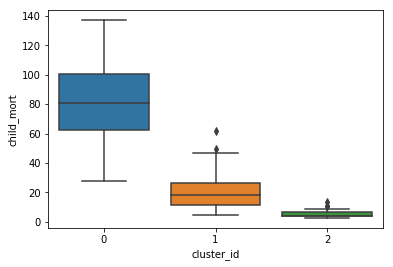

In [36]:
# plot child_mort
sns.boxplot(x='cluster_id', y='child_mort', data=country)

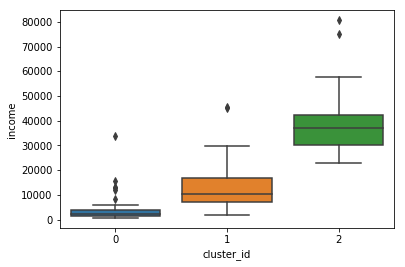

In [38]:
# plot income
sns.boxplot(x='cluster_id', y='income', data=country)

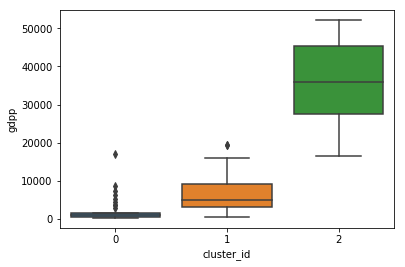

In [40]:
# plot gdpp
sns.boxplot(x='cluster_id', y='gdpp', data=country)

From the above three plots, we can clearly see that countries are divided into three clusters of Developed (cluster 2), Developing (cluster 1) and Under-developed (cluster 0) countries wherein the child mortality rate is highest in under-developed countires or cluster 0 whereas income and gdpp of these countires is lowest.

Similarly, we can see that child mortality for developed countires or cluster 2 is lowest and income and gdpp of these countries is highest.

For developing countries or cluster 1, all these variables are somewhere in between of the above 2

Now the countries in dire need of aids are clearly the countries from cluster 0 as identified by K-means clustering above. Lets now try and find out the 5 countires in custer 0 which should be reported back to the CEO

In [56]:
#getting under developed countries into a new df
underdeveloped = country[country.cluster_id==0]
underdeveloped.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0
17,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,0
21,Botswana,52.5,43.6,8.30,51.3,13300,8.920,57.1,2.88,6350,0
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575,0


In [64]:
#sorting by highest child_mort
underdeveloped = underdeveloped.sort_values(by=['child_mort'], ascending = False)
underdeveloped.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
97,Mali,137.0,22.8,4.98,35.1,1870,4.370,59.5,6.55,708,0
112,Niger,123.0,22.2,5.16,49.1,814,2.550,58.8,7.49,348,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.800,57.5,6.54,334,0
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575,0
64,Guinea-Bissau,114.0,14.9,8.50,35.2,1390,2.970,55.6,5.05,547,0
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.900,60.9,5.21,17100,0
40,Cote d'Ivoire,111.0,50.6,5.30,43.3,2690,5.390,56.3,5.27,1220,0
17,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,0
63,Guinea,109.0,30.3,4.93,43.2,1190,16.100,58.0,5.34,648,0


In [65]:
#sorting by lowest income
underdeveloped = underdeveloped.sort_values(by=['income'])
underdeveloped.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,0
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,0
63,Guinea,109.0,30.30,4.93,43.2,1190,16.10,58.0,5.34,648,0
150,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488,0
126,Rwanda,63.6,12.00,10.50,30.0,1350,2.61,64.6,4.51,563,0
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,0


In [67]:
#sorting by lowest gdpp
underdeveloped = underdeveloped.sort_values(by=['gdpp'])
underdeveloped.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,0
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,0
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,0
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482,0
150,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488,0
64,Guinea-Bissau,114.0,14.90,8.50,35.2,1390,2.97,55.6,5.05,547,0


By sorting the underdeveoped countries by highest child_mort and lowest incme and gdpp, we can finalize the following countries to be in the direst need of aid as identified by K-means clustering algorithm:

- Congo, Dem. Rep.
- Niger
- Burundi
- Mozambique
- Togo
- Madagascar
- Guinea
- Guinea-Bissau

### Performing Hierarchical clustering on PCA data

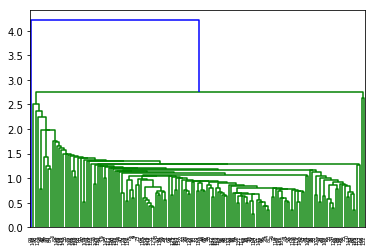

In [84]:
#single linkage
mergings = linkage(df_country_pca, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

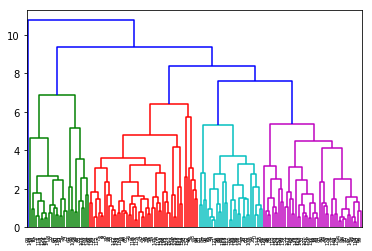

In [85]:
# complete linkage
mergings1 = linkage(df_country_pca, method="complete", metric='euclidean')
dendrogram(mergings1)
plt.show()

From the above hierarchical cluster using both single and complete linkages, we can see that dendrogram for complete linkage looks highly interpretable as comapred to dendrogram for single linkage. hence we will use the results of complete linkage only for further analysis.

In [94]:
# 3 clusters
cluster_labels = cut_tree(mergings1, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0])

In [95]:
# assign cluster labels to original df
country['cluster_labels'] = cluster_labels
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,0


__Plotting gdpp, child_mort and income to analysze the clusters formed__

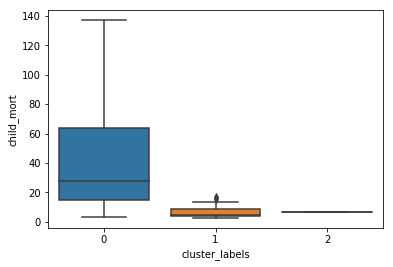

In [96]:
# plot child_mort
sns.boxplot(x='cluster_labels', y='child_mort', data=country)

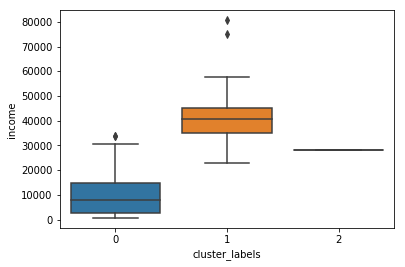

In [97]:
# plot income
sns.boxplot(x='cluster_labels', y='income', data=country)

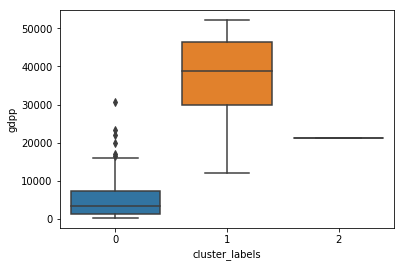

In [99]:
# plot gdpp
sns.boxplot(x='cluster_labels', y='gdpp', data=country)

From the above 3 clusters formed by Hierarchical clustering, we can observe that the cluster 2 only has one country associated with it and hence doesn't really make any sense. However cluster 0 and cluster 1 form an identifiable pattern where cluster 0 seems to be formed of under developed countries wherein the child mortality rate is highest and income and gdpp are lowest.

on the contrary, cluster 1 seems to be of developed countries wherein child mortality rate is lowest and income and gdpp is highest. hence obviously, countires from cluster 0 are in real need of aid.

Now lets try and identify the top 5 countries in direst need of aid as identified by Hierarchical clustering.

In [101]:
#getting under developed countries into a new df
underdeveloped1 = country[country.cluster_labels==0]
underdeveloped1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,0


In [103]:
#sorting by highest child_mort
underdeveloped1 = underdeveloped1.sort_values(by=['child_mort'], ascending = False)
underdeveloped1.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
97,Mali,137.0,22.8,4.98,35.1,1870,4.370,59.5,6.55,708,0,0
112,Niger,123.0,22.2,5.16,49.1,814,2.550,58.8,7.49,348,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0,0
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.800,57.5,6.54,334,0,0
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575,0,0
64,Guinea-Bissau,114.0,14.9,8.50,35.2,1390,2.970,55.6,5.05,547,0,0
40,Cote d'Ivoire,111.0,50.6,5.30,43.3,2690,5.390,56.3,5.27,1220,0,0
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.900,60.9,5.21,17100,0,0
17,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,0,0
63,Guinea,109.0,30.3,4.93,43.2,1190,16.100,58.0,5.34,648,0,0


In [105]:
#sorting by lowest income
underdeveloped1 = underdeveloped1.sort_values(by=['income'])
underdeveloped1.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0,0
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0,0
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0,0
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,0,0
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,0,0
63,Guinea,109.0,30.30,4.93,43.2,1190,16.10,58.0,5.34,648,0,0
150,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488,0,0
126,Rwanda,63.6,12.00,10.50,30.0,1350,2.61,64.6,4.51,563,0,0
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,0,0


In [110]:
#sorting by lowest gdpp
underdeveloped1 = underdeveloped1.sort_values(by=['gdpp'])
underdeveloped1.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0,0
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0,0
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0,0
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0,0
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,0,0
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,0,0
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,0,0
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482,0,0
150,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488,0,0
64,Guinea-Bissau,114.0,14.90,8.50,35.2,1390,2.97,55.6,5.05,547,0,0


__Looking at the cluster formed by K-means and Hierarchical clustering algorithm above, we can see that clusters formed by K-means are uniform with good number of countries falling under eaach cluster formed. However same was not the case with Hierarchical clustering wherein one cluster formed had only one or two country associated with it.
Therefore I believe K-means clustering is a better of choice of algorithm for this problem at hand.__

__Having said that though - By sorting the underdeveoped countries by highest child_mort and lowest income and gdpp for underdeveloped countries, we see that results obtained from Hierarchical clustering are almost the same as obtained by K-means clustering. hence we finalize the following list of countries to be reported back to the CEO__

- Congo, Dem. Rep.
- Niger
- Burundi
- Mozambique
- Togo
- Madagascar
- Guinea
- Guinea-Bissaue

### Visualizing the K-means clusters with PCs on X-Y axes

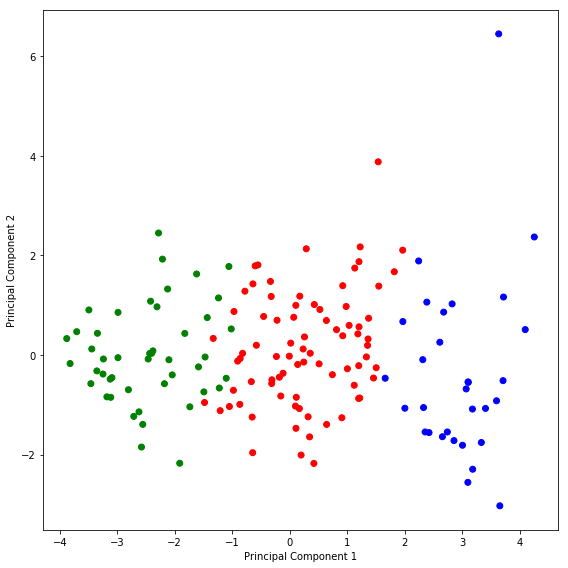

In [121]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_country_pca[:,0], df_country_pca[:,1], c = country['cluster_id'].map({0:'green',1:'red', 2:'blue'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

From above, we can definitely see a pattern between the clusters. Individual countries in each clusters are closely grouped together and show an increasing trend n PC1 as the cluster moves from underdeveloped to developed countries

### Visualizing clusters against PCs in 3D

<IPython.core.display.Javascript object>


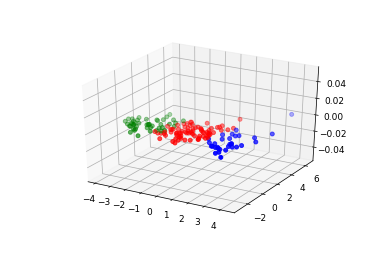

In [140]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot
import random
fig = pyplot.figure()
ax = Axes3D(fig)
sequence_containing_x_vals = list(range(0, 100))
sequence_containing_y_vals = list(range(0, 100))
sequence_containing_z_vals = list(range(0, 100))

random.shuffle(sequence_containing_x_vals)
random.shuffle(sequence_containing_y_vals)
random.shuffle(sequence_containing_z_vals)
ax = plt.axes(projection='3d')
ax.scatter(df_country_pca[:,0], df_country_pca[:,1], c = country['cluster_id'].map({0:'green',1:'red', 2:'blue'}))
pyplot.show()

### Visualizing the K-means clusters with original variables on X-Y axes

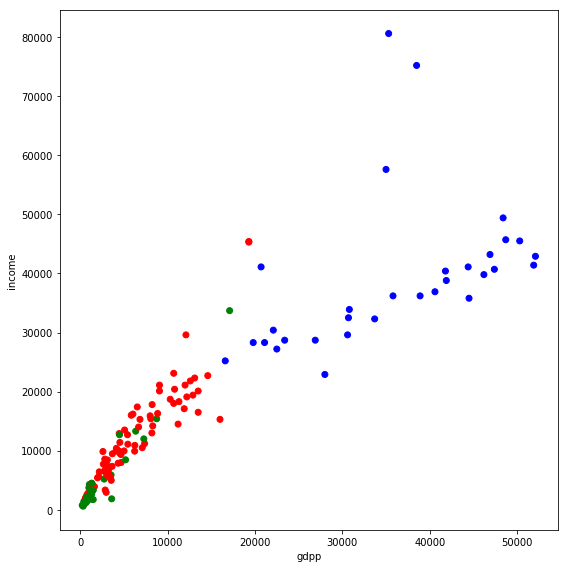

In [122]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(country['gdpp'], country['income'], c = country['cluster_id'].map({0:'green',1:'red', 2:'blue'}))
plt.xlabel('gdpp')
plt.ylabel('income')
plt.tight_layout()
plt.show()

Plotting the clusters against income and gdpp, we can see that as the clusters move from underdeveloped(green) to developed(blue), both the income as well as the gdpp of the countires increases.

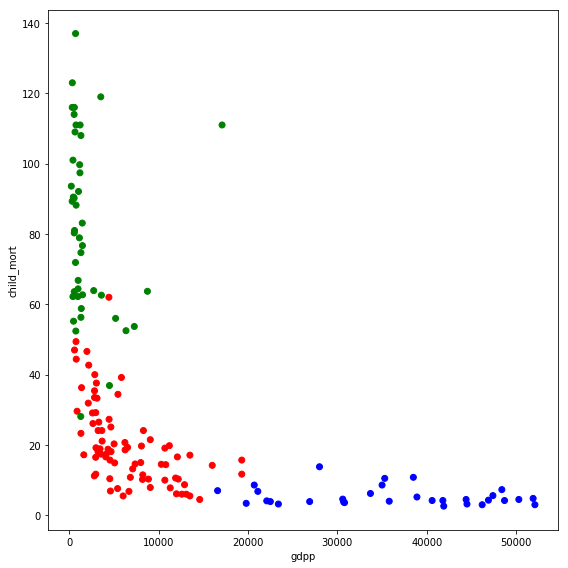

In [123]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(country['gdpp'], country['child_mort'], c = country['cluster_id'].map({0:'green',1:'red', 2:'blue'}))
plt.xlabel('gdpp')
plt.ylabel('child_mort')
plt.tight_layout()
plt.show()

Plotting the clusters against child mortality and gdpp, we can see that as the clusters move from underdeveloped(green) to developed(blue), the child mortality decreases whereas the gdpp increases.

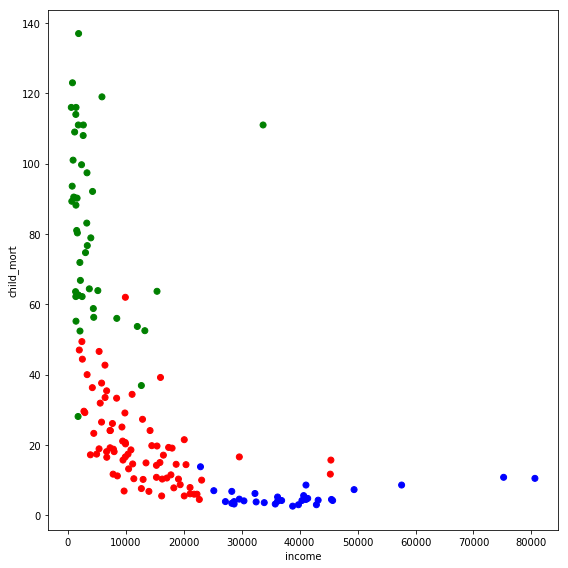

In [126]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(country['income'], country['child_mort'], c = country['cluster_id'].map({0:'green',1:'red', 2:'blue'}))
plt.xlabel('income')
plt.ylabel('child_mort')
plt.tight_layout()
plt.show()

Same pattern can be seen while plotting the clusters against child mortality and income wherein as the clusters move from underdeveloped(green) to developed(blue), the child mortality decreases whereas the income increases.